In [1]:
import numpy as np
data = np.load('Efavg_1000K.npz')
print(data.files)
data1 = np.load('Efavg_500K.npz')
print(data1.files)

['Efavg_1000', 'En_1000', 'Eautoc_1000']
['Efavg_500', 'En_500', 'Eautoc_500']


/tmp/ipykernel_233140/2477578590.py:16: RuntimeWarning: invalid value encountered in divide
  return(hbar*omega/np.pi/c/(np.exp(hdk*omega/T)-1))


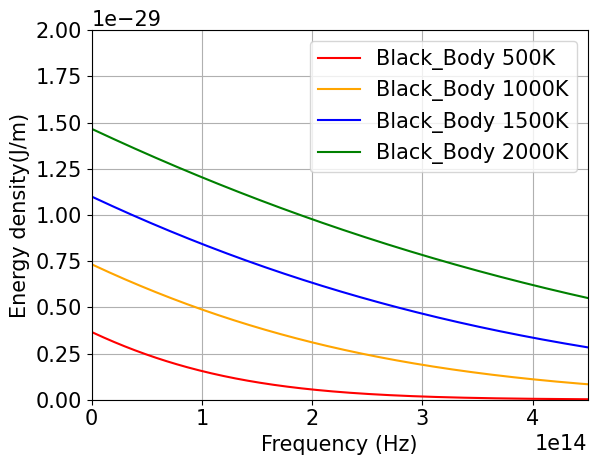

In [2]:
import matplotlib.pyplot as plt
M=2**21
tsim=7e-12
eps0 = 8.854187e-12
hbar = 1.05457182e-34
c = 2.99792458e8
kb = 1.380649e-23
hdk=7.63823258e-12
deltap = np.sqrt(1/3/eps0/hbar/c)*kb
T=30000
limit=1000
frequency_limit = np.linspace(0, 25, limit)
frequency = frequency_limit*10**13
omega = frequency*np.pi*2
def D(omega,T):
    return(hbar*omega/np.pi/c/(np.exp(hdk*omega/T)-1))
Efavg = data['Efavg_1000']
Efavg1 = data1['Efavg_500']
freqs = np.linspace(0,2*2**17*np.pi/(7*1e-12),2**17)
plt.rcParams.update({'font.size': 15})
#plt.plot(freqs,Efavg*tsim*eps0*4*np.pi*3/M*2.75e4/2,'b''.',label='Simulation 1000K')
#plt.plot(freqs,Efavg1*tsim*eps0*4*np.pi*3/M*2.75e4/2,'g''.',label='Simulation 500K')
plt.plot(omega,D(omega,500)/2,'red',label='Black_Body 500K')
plt.plot(omega,D(omega,1000)/2,'orange',label='Black_Body 1000K')

plt.plot(omega,D(omega,1500)/2,'b',label='Black_Body 1500K')
plt.plot(omega,D(omega,2000)/2,'g',label='Black_Body 2000K')
plt.xlim(0,4.5e14)
plt.ylim(0,2e-29)
plt.grid()
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Energy density(J/m)')
plt.savefig('500_1000_BB.png')
plt.show()


In [3]:
from PIL import Image

def transPNG(srcImageName, dstImageName):
    img = Image.open(srcImageName)
    img = img.convert("RGBA")
    datas = img.getdata()
    newData = list()
    for item in datas:
        if item[0] > 225 and item[1] > 225 and item[2] > 225:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    img.putdata(newData)
    img.save(dstImageName, "PNG")
transPNG('3000K_1.5_4.5e14.png','new3000K_1.5_4.5e14.png')

/root/miniconda3/envs/mp/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


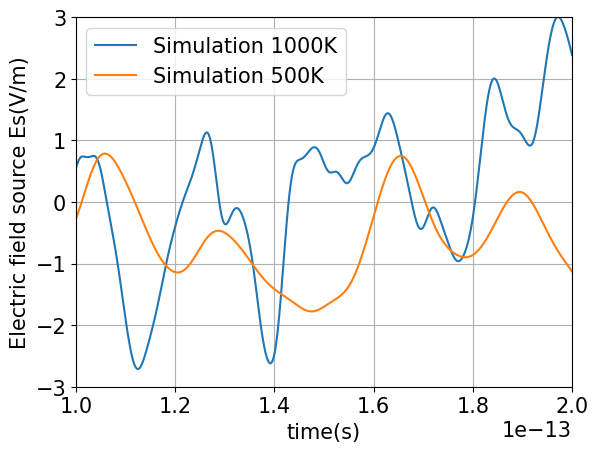

In [4]:
timess = np.linspace(0,7*1e-12,131072)
En = data['En_1000']
En1 = data1['En_500']
plt.plot(timess,En*1e7,label='Simulation 1000K')
plt.plot(timess,En1*1e7,label='Simulation 500K')
plt.xlim(10e-14,20e-14)
plt.ylim(-3,3)
plt.xlabel('time(s)')
plt.ylabel('Electric field source Es(V/m)')
plt.grid()
plt.legend()
plt.savefig('500_1000_Es.png')

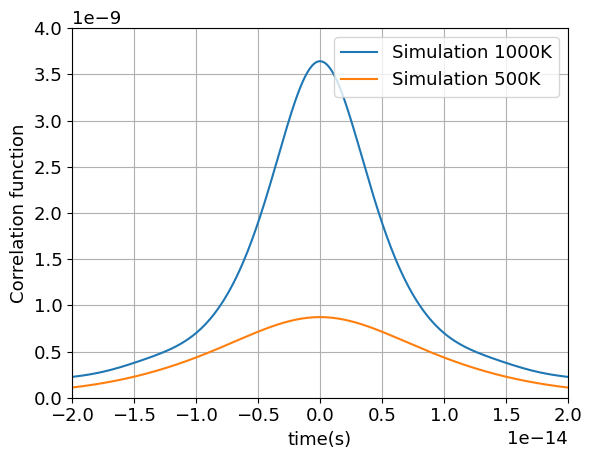

In [7]:
timesss = np.linspace(-7*1e-12,7*1e-12,262143)
Eautoc = data['Eautoc_1000']
Eautoc1 = data1['Eautoc_500']
plt.rcParams.update({'font.size': 13})
plt.plot(timesss,Eautoc,label='Simulation 1000K')
plt.plot(timesss,Eautoc1,label='Simulation 500K')
plt.xlim(-2e-14,2e-14)
plt.ylim(0,4e-9)
plt.xlabel('time(s)')
plt.ylabel('Correlation function')
plt.grid()
plt.legend()
plt.savefig('500_1000_CF.png')